<a href="https://colab.research.google.com/github/shubhankar-mern/MLBasicsLearn/blob/master/computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights="imagenet", include_top=True)


14536120/14536120 [==============================] - 1s 0us/step


In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving business-close-up-confidence-corporate.jpg to business-close-up-confidence-corporate (1).jpg


In [6]:
def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

# Replace 'input_image.jpg' with the path to your input image
input_image = load_and_preprocess_image("/content/business-close-up-confidence-corporate.jpg")


In [7]:
# Make predictions
predictions = model.predict(input_image)


1/1 [==============================] - 1s 1s/step


In [8]:
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

# Decode the predictions to get human-readable labels
label = decode_predictions(predictions, top=1)[0][0][1]

# Print the label with the highest confidence
print("Predicted Label:", label)


35363/35363 [==============================] - 0s 0us/step
Predicted Label: suit


1/1 [==============================] - 1s 858ms/step


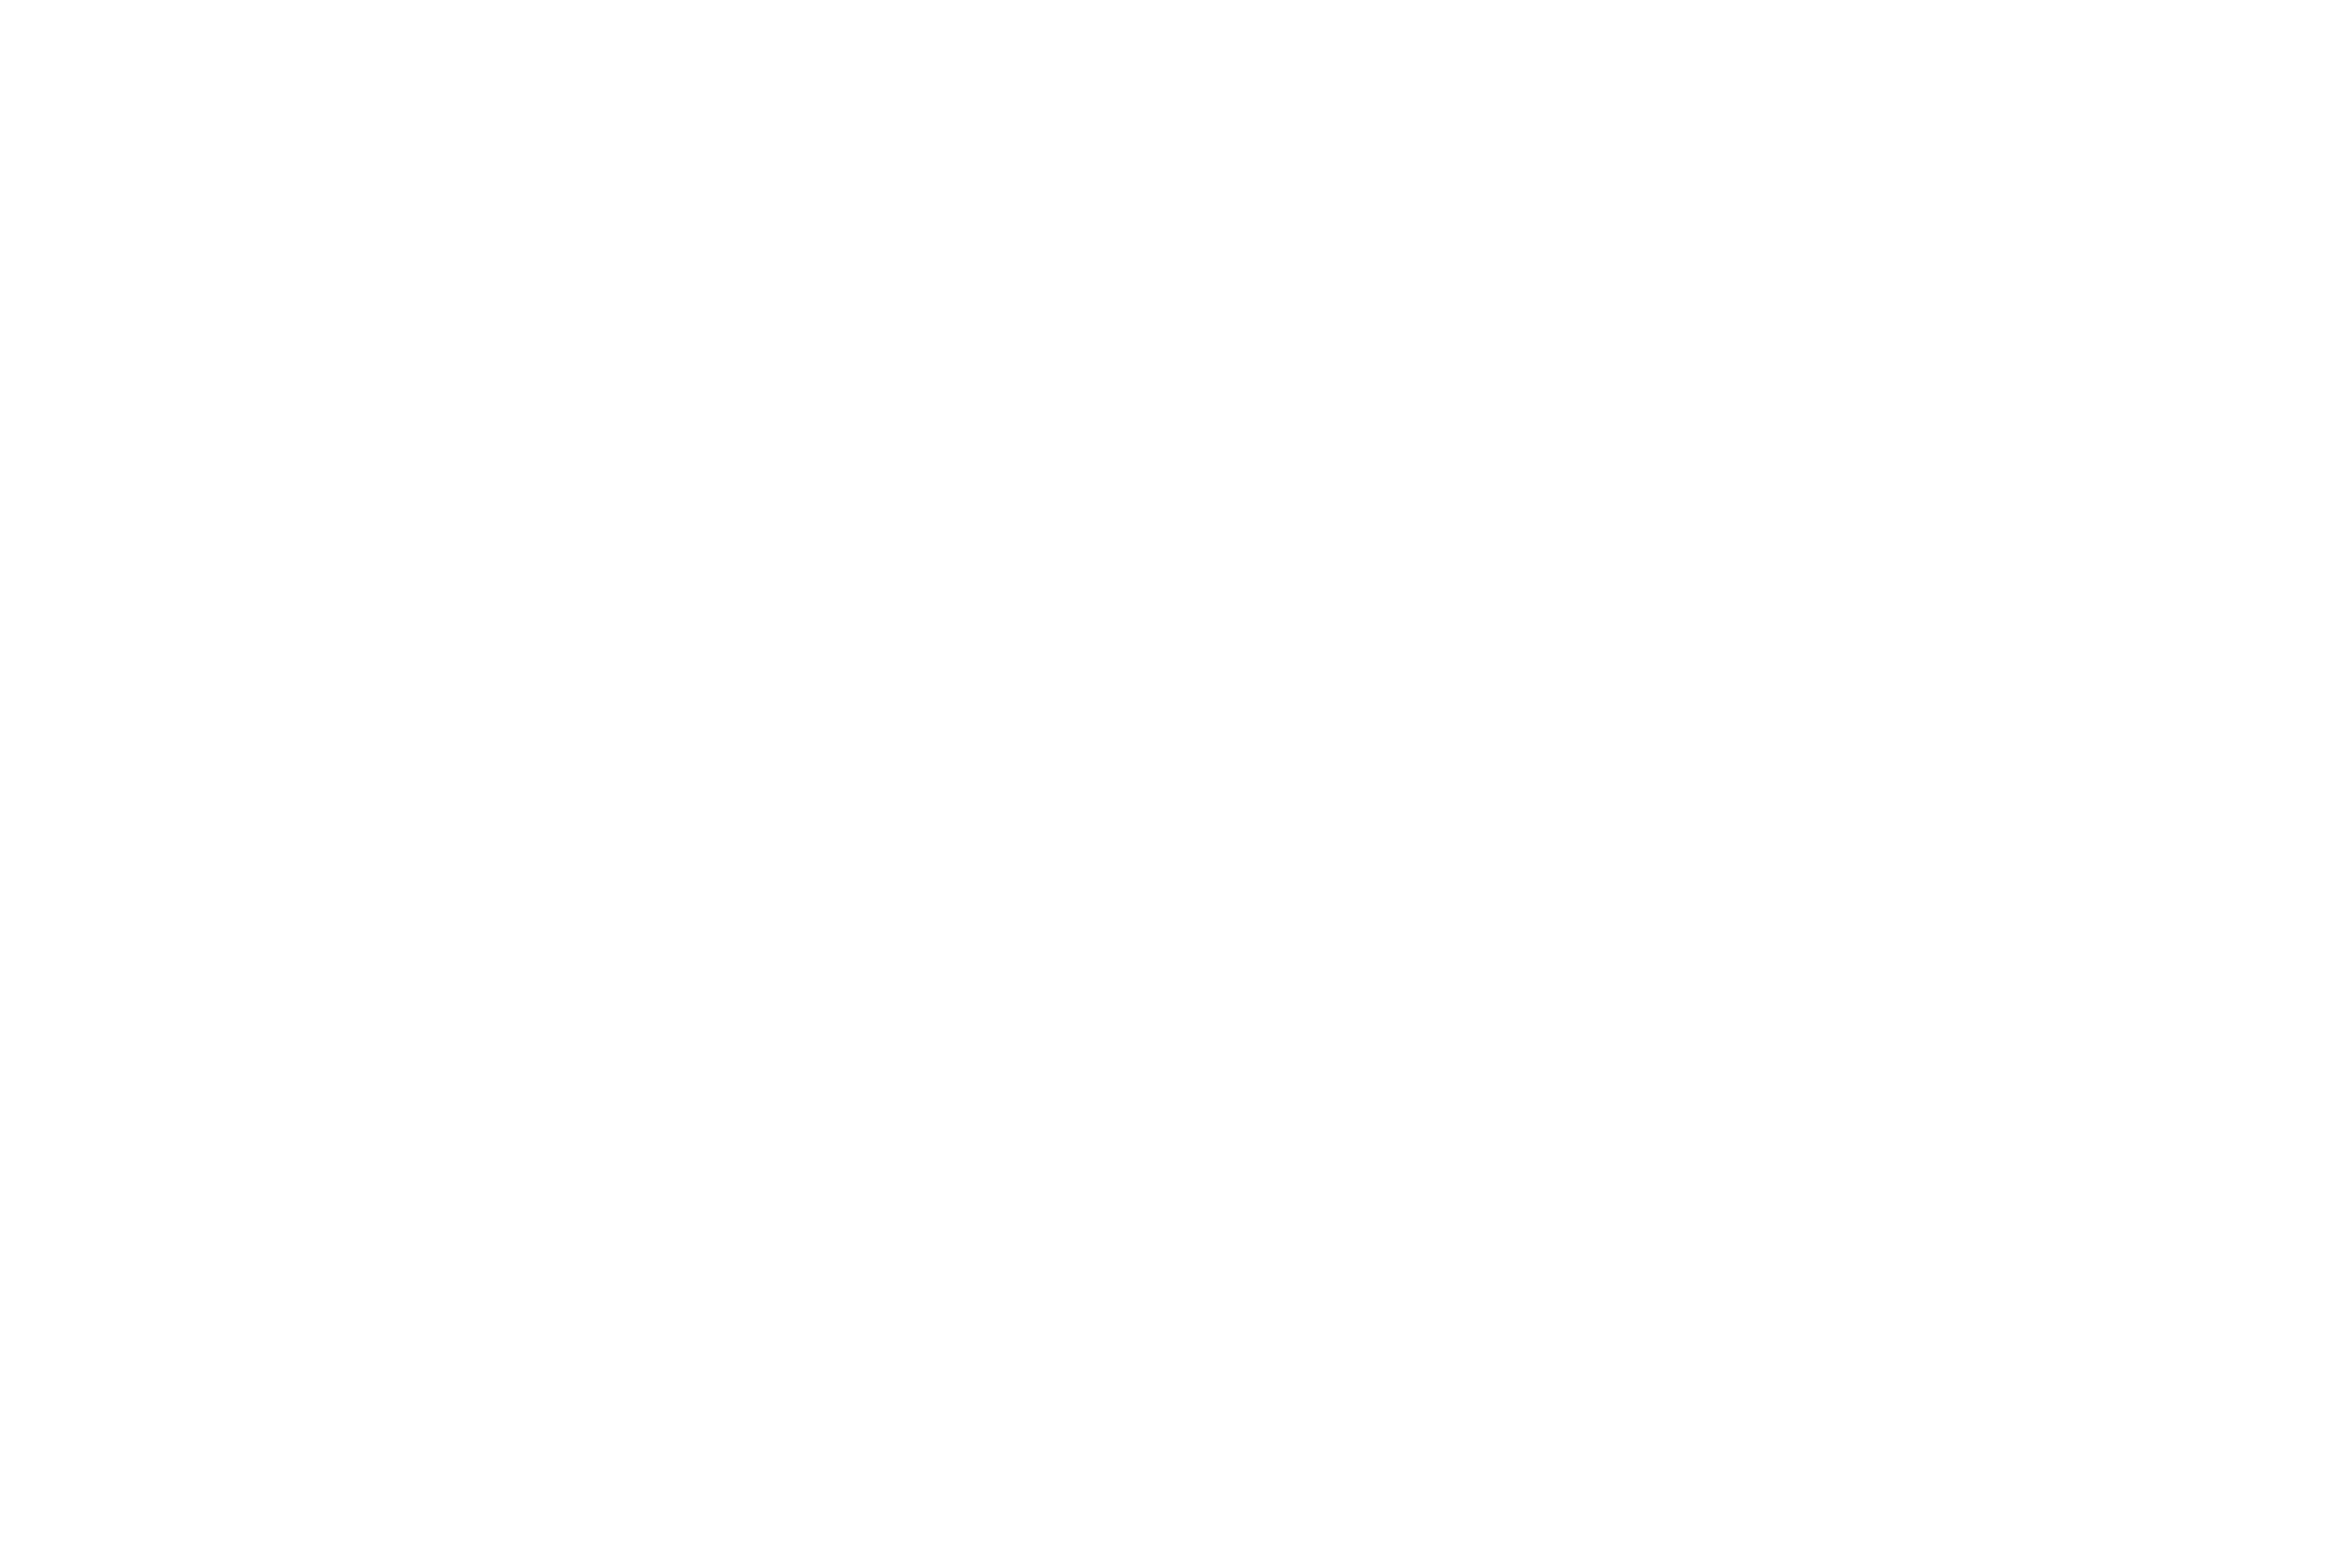

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights="imagenet", include_top=True)

# Replace 'input_image.jpg' with the path to your input image
image_path = "/content/business-close-up-confidence-corporate.jpg"

def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

def background_separation(image_path, model, confidence_threshold=0.2):
    # Load and preprocess the input image
    input_image = load_and_preprocess_image(image_path)

    # Make predictions using the pre-trained model
    predictions = model.predict(input_image)

    # Get the index of the predicted class in the model's output
    predicted_class_index = np.argmax(predictions)

    # Get the confidence (probability) of the predicted class
    predicted_confidence = predictions[0][predicted_class_index]

    # Check if the confidence is higher than the threshold
    if predicted_confidence > confidence_threshold:
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        output_image = image.copy()

        # Create a mask for the foreground class
        mask = np.zeros_like(image)
        mask = cv2.rectangle(mask, (0, 0), (image.shape[1], image.shape[0]), (255, 255, 255), -1)
        output_image = np.where(mask == 0, output_image, 255)

        # Display the resulting image with the background separated
        cv2_imshow(output_image)
    else:
        print("No foreground object detected with confidence above the threshold.")

# Perform background separation for the given image
background_separation(image_path, model)


In [14]:
pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [10]:
## ml.sg

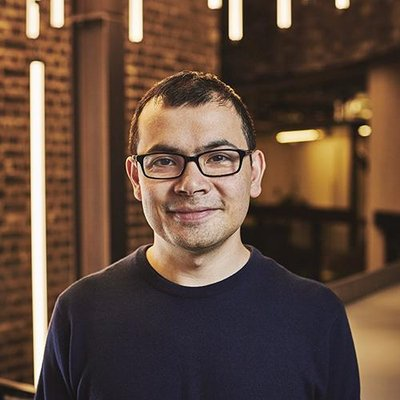

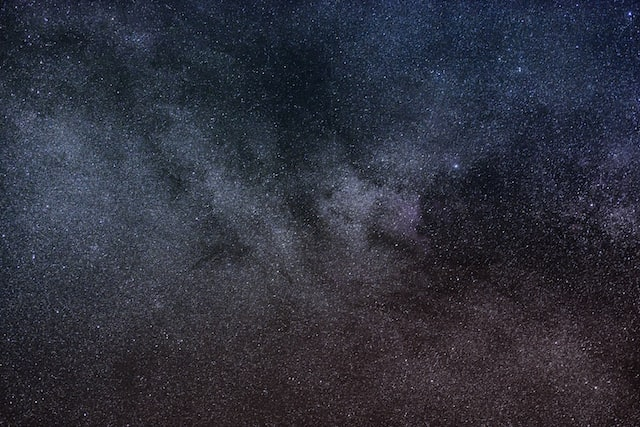

In [11]:
import cv2
from urllib.request import urlretrieve
from google.colab.patches import cv2_imshow

# save the foreground and background to our local storage
urlretrieve('https://pbs.twimg.com/profile_images/691700243809718272/z7XZUARB_400x400.jpg', '/content/profile.jpg')
urlretrieve('https://images.unsplash.com/photo-1475139441338-693e7dbe20b6?auto=format&fit=crop&w=640&q=427', '/content/background.jpg')

# display the images in the notebook
cv2_imshow(cv2.imread('/content/profile.jpg'))
cv2_imshow(cv2.imread('/content/background.jpg'))

In [12]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

def load_model():
  model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
  model.eval()
  return model

def make_transparent_foreground(pic, mask):
  # split the image into channels
  b, g, r = cv2.split(np.array(pic).astype('uint8'))
  # add an alpha channel with and fill all with transparent pixels (max 255)
  a = np.ones(mask.shape, dtype='uint8') * 255
  # merge the alpha channel back
  alpha_im = cv2.merge([b, g, r, a], 4)
  # create a transparent background
  bg = np.zeros(alpha_im.shape)
  # setup the new mask
  new_mask = np.stack([mask, mask, mask, mask], axis=2)
  # copy only the foreground color pixels from the original image where mask is set
  foreground = np.where(new_mask, alpha_im, bg).astype(np.uint8)

  return foreground

def remove_background(model, input_file):
  input_image = Image.open(input_file)
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)

  # create a binary (black and white) mask of the profile foreground
  mask = output_predictions.byte().cpu().numpy()
  background = np.zeros(mask.shape)
  bin_mask = np.where(mask, 255, background).astype(np.uint8)

  foreground = make_transparent_foreground(input_image ,bin_mask)

  return foreground, bin_mask

In [22]:
import cv2
from google.colab.patches import cv2_imshow

# Replace 'input_image.jpg' with the path to your input image
input_image_path = "/content/business-close-up-confidence-corporate.jpg"

# Read the input image using OpenCV
image = cv2.imread(input_image_path)

# Replace 'new_width' and 'new_height' with the desired dimensions for resizing
new_width = 500
new_height = 300

# Resize the image using OpenCV's resize function
resized_image = cv2.resize(image, (new_width, new_height))

# Replace 'output_resized_image.jpg' with the desired name and extension for the resized image
output_image_path = "/content/Corporate.jpg"

# Save the resized image to a new file using OpenCV


# Display the resized image (optional)
cv2.imread('/content/Corporate.jpg')
cv2.imwrite(output_image_path, resized_image)


True

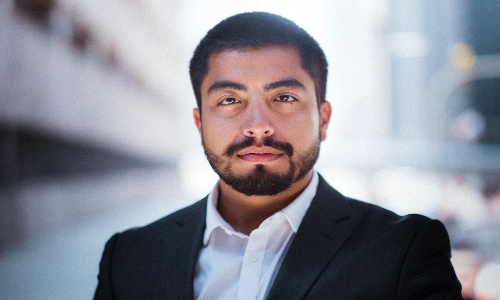

In [24]:
import cv2
import numpy as np

# Replace 'input_image.jpg' with the path to your input image
input_image_path = "/content/Corporate.jpg"

# Load the image using OpenCV (BGR format)
bgr_image = cv2.imread(input_image_path)

# Convert the BGR image to BGRA (add alpha channel)
bgra_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2BGRA)

# Clip the pixel values to the range [0, 255] and convert to 'uint8' data type
clipped_image = np.clip(bgra_image, 0, 255).astype('uint8')

# Now the 'clipped_image' is a NumPy array with values in the range [0, 255]
cv2_imshow(clipped_image)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


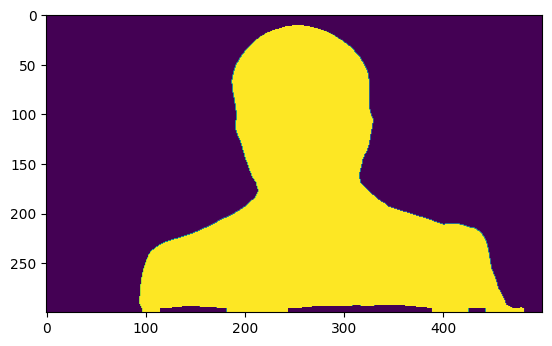

In [29]:
deeplab_model = load_model()
foreground, bin_mask = remove_background(deeplab_model, '/content/Corporate.jpg')
plt.imshow(bin_mask)

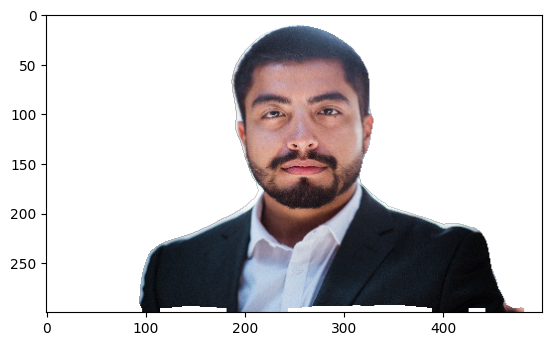

In [27]:
plt.imshow(foreground)

In [15]:
Image.fromarray(foreground).save("/content/foreground.png")

In [16]:
def custom_background(background_file, foreground):
  final_foreground = Image.fromarray(foreground)
  background = Image.open(background_file)
  x = (background.size[0]-final_foreground.size[0])/2
  y = (background.size[1]-final_foreground.size[1])/2
  box = (x, y, final_foreground.size[0] + x, final_foreground.size[1] + y)
  crop = background.crop(box)
  final_image = crop.copy()
  # put the foreground in the centre of the background
  paste_box = (0, final_image.size[1] - final_foreground.size[1], final_image.size[0], final_image.size[1])
  final_image.paste(final_foreground, paste_box, mask=final_foreground)
  return final_image

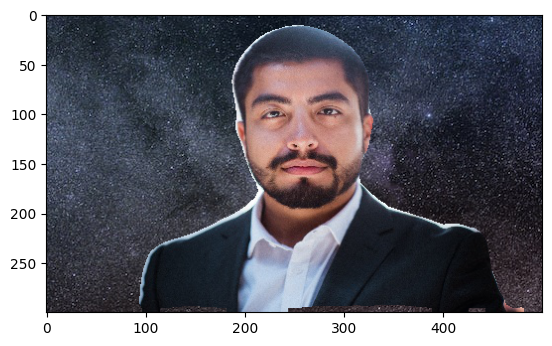

In [28]:
final_image = custom_background('/content/background.jpg', foreground)
plt.imshow(final_image)

In [30]:
#### super face resolution

In [2]:
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/sberbank-ai/Real-ESRGAN
%cd Real-ESRGAN
!git lfs fetch
!git lfs checkout

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 34, done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (34/34), 3.76 MiB | 2.98 MiB/s, done.
/content/Real-ESRGAN/Real-ESRGAN
fetch: Fetching reference refs/heads/main
Checking out LFS objects: 100% (3/3), 201 MB | 0 B/s, done.


In [3]:
!ls -lh

total 192M
-rw-r--r-- 1 root root 1.2K Jul 18 15:23 README.md
-rw-r--r-- 1 root root  64M Jul 18 15:23 RealESRGAN_x2.pth
-rw-r--r-- 1 root root  64M Jul 18 15:23 RealESRGAN_x4.pth
-rw-r--r-- 1 root root  65M Jul 18 15:23 RealESRGAN_x8.pth


In [4]:
!pip install -q torch torchvision

In [5]:
!pip install -q git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.0 MB/s eta 0:00:00


In [6]:
!wget -q https://raw.githubusercontent.com/ai-forever/Real-ESRGAN/main/inputs/lr_face.png

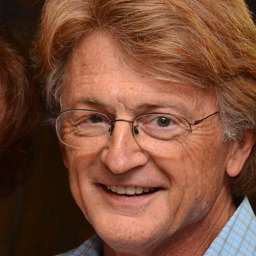

In [7]:
import cv2
from google.colab.patches import cv2_imshow

## display the image in the notebook
cv2_imshow(cv2.imread('lr_face.png'))

In [8]:
import torch
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('RealESRGAN_x4.pth', download=False)

In [9]:
from PIL import Image
import numpy as np

path_to_image = 'lr_face.png'
image = Image.open(path_to_image).convert('RGB')

sr_image = model.predict(image)

sr_image.save('sr_face.png')

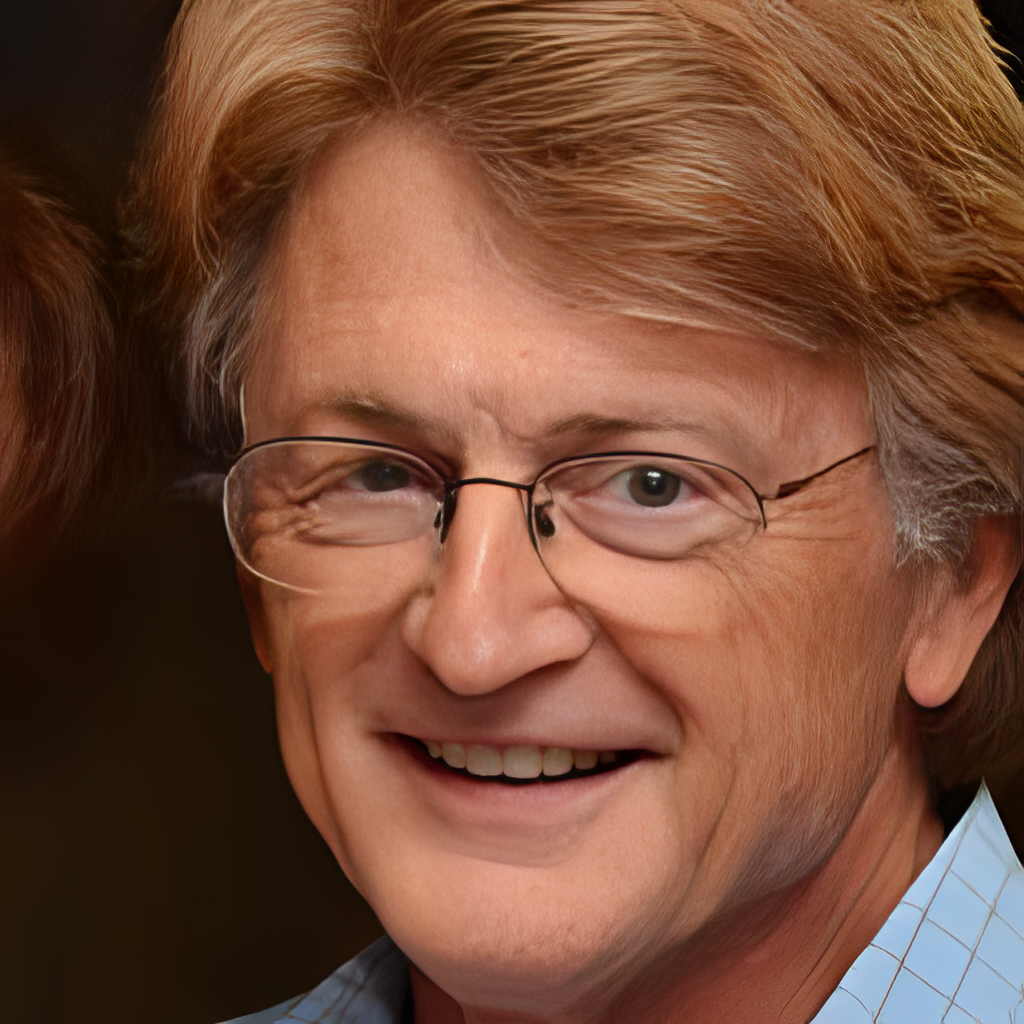

In [10]:
cv2_imshow(cv2.imread('sr_face.png'))

In [11]:
from google.colab import files
from IPython.display import Image

In [12]:
uploaded = files.upload()

Saving shubhankar.jpg to shubhankar.jpg


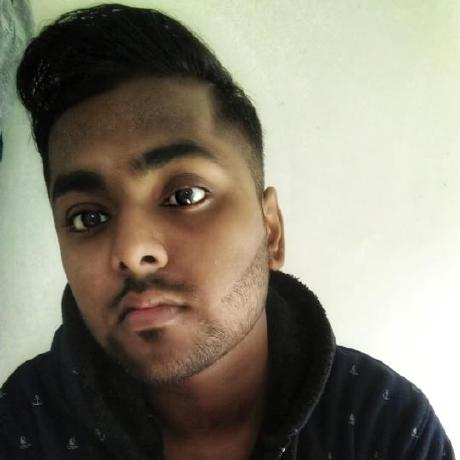

In [13]:
cv2_imshow(cv2.imread('/content/Real-ESRGAN/Real-ESRGAN/shubhankar.jpg'))

In [14]:
from PIL import Image
import numpy as np

path_to_image = '/content/Real-ESRGAN/Real-ESRGAN/shubhankar.jpg'
image = Image.open(path_to_image).convert('RGB')

sr_image = model.predict(image)

sr_image.save('sks_face.png')

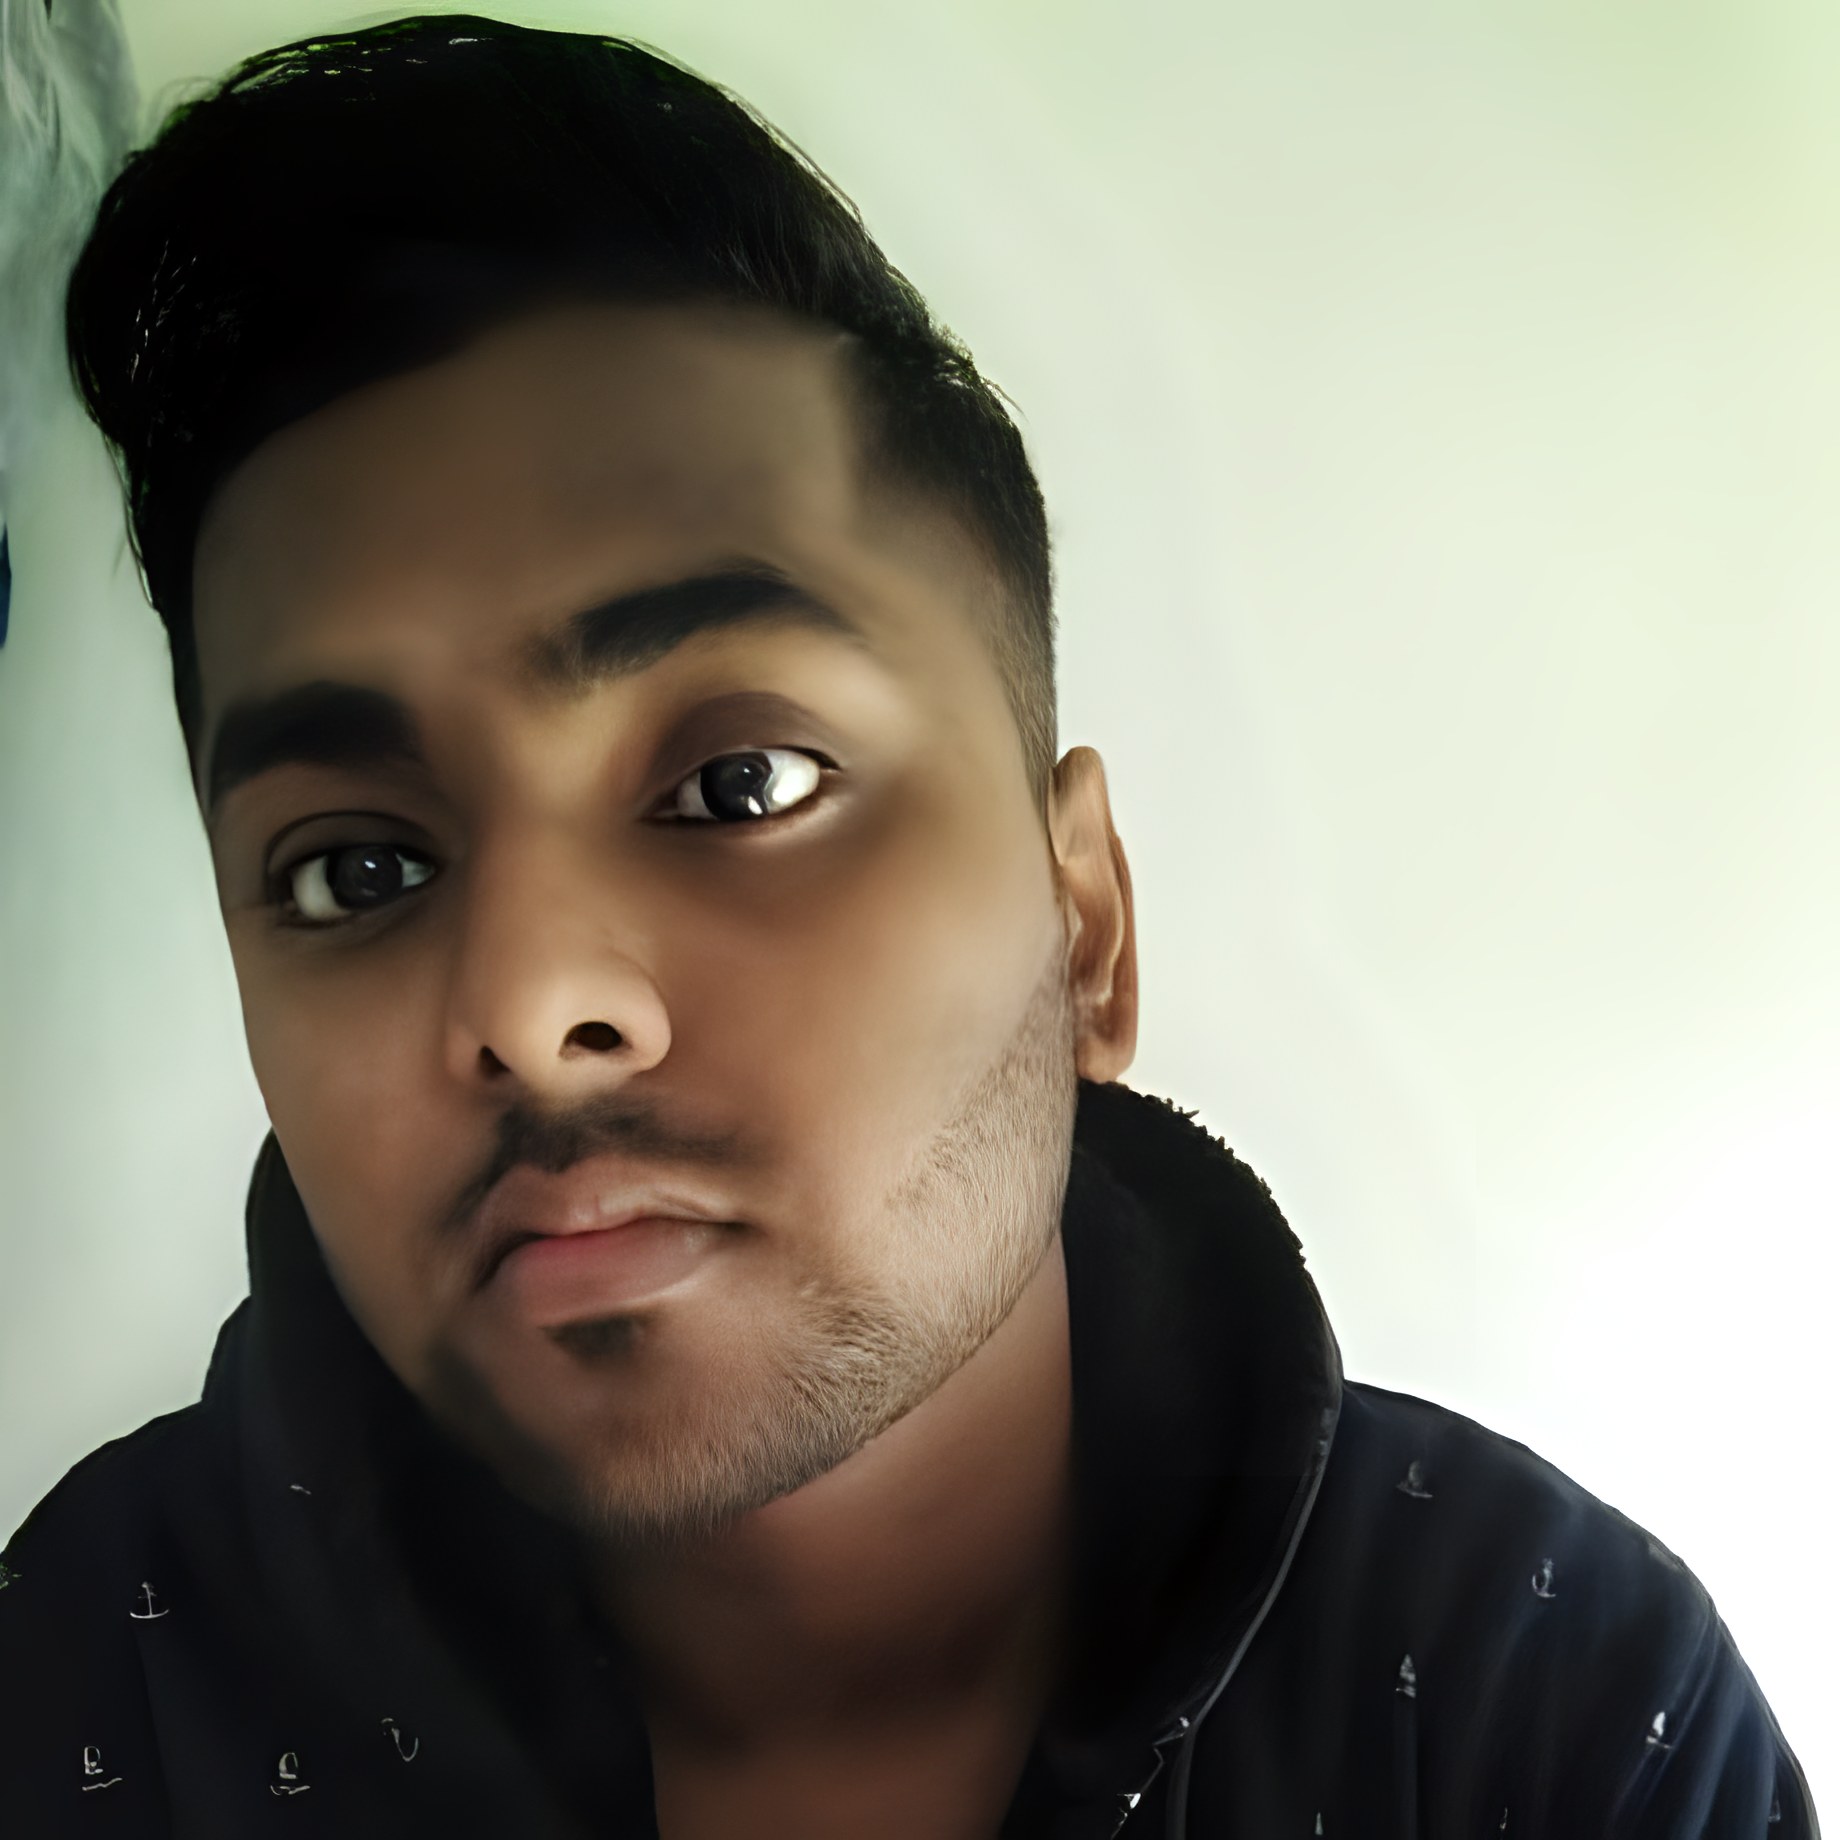

In [15]:
cv2_imshow(cv2.imread('/content/Real-ESRGAN/Real-ESRGAN/sks_face.png'))